<a href="https://colab.research.google.com/github/Ssurf777/DL_from_scratch/blob/main/Deep_Learning_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning from scratch

# 多次元配列

In [ ]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


配列次元数の取得 np.ndim()

In [ ]:
print(f'{np.ndim(A)}次元')

1次元


In [ ]:
print(A.shape)

(4,)


In [ ]:
print(A.shape[0])

4


In [ ]:
B = np.array([ [1,2],[3,4],[5,6] ])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

$$
\begin{pmatrix}1 & 2 \\3 & 4\end{pmatrix}
\begin{pmatrix}5 & 6 \\7 & 8\end{pmatrix}
=\begin{pmatrix} 19 & 22 \\ 43 & 50 \end{pmatrix}
$$

In [ ]:
A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])
C = np.dot(A, B)
print(C)

[[19 22]
 [43 50]]


$$
\begin{pmatrix}1 & 2 & 3\\4 & 5 & 6\end{pmatrix}
\begin{pmatrix}1 & 2 \\3 & 4\\5 & 6\end{pmatrix}
=\begin{pmatrix} 22 & 28 \\ 49 & 64 \end{pmatrix}
$$

In [ ]:
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)

print("※2行3列×3行2列であると2行2列になる")

(2, 3)
(3, 2)
※2行3列×3行2列であると2行2列になる


In [ ]:
C = np.dot(A, B)
print(C)

[[22 28]
 [49 64]]


$$
\begin{pmatrix}1 & 2 \\3 & 4 \\ 5 & 6\end{pmatrix}
\begin{pmatrix}7 & 8\end{pmatrix}
=\begin{pmatrix} 23 & 53 & 83 \end{pmatrix}
$$

In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])
C = np.dot(A, B)
print(C)

[23 53 83]


# ニューラルネットワークの実装

In [ ]:
import numpy as np

# Neural Network INPUT
X = np.array([1,2])
print(f'X.shape:{X.shape}')

# Weight
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(f'W.shape:{W.shape}')

X.shape:(2,)
[[1 3 5]
 [2 4 6]]
W.shape:(2, 3)


In [ ]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## ☆各層における信号伝達の実装

$$
A^{(1)} = \begin{pmatrix}
a^{(1)}_1 & a^{(1)}_2 & a^{(1)}_3
\end{pmatrix}
$$

$$
X=\begin{pmatrix}
x_1&x_2
\end{pmatrix}
$$

$$
B^{(1)} = \begin{pmatrix}
b^{(1)}_1 & b^{(1)}_2 & b^{(1)}_3
\end{pmatrix}
$$

$$
W^{(1)} = \begin{pmatrix}
w^{(1)}_{11} & w^{(1)}_{12} & w^{(1)}_{13} \\
w^{(1)}_{21} & w^{(1)}_{22} & w^{(1)}_{23}
\end{pmatrix}
$$


### ☆重みの記号の読み方


$$
w^{(1)}_{12}
$$
重みの()内は1層目の重みを指し
下付き12は前層2番目のニューロンから次層1番目のニューロンを結ぶエッジの重み

In [ ]:
  import numpy as np

  # INPUT 1x2
  X = np.array([1.0, 0.5])

  # Weight of hidden layer1 2x3
  W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])

  # baias 1x3
  B1 = np.array([0.1, 0.2, 0.3])

  print(W1.shape)
  print(X.shape)
  print(B1.shape)

# OUTPUT 1x3
  A1 =  np.dot(X, W1) + B1
  print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


### ☆Sigmoid関数の定義

$$
sigmoid(x)=\frac{1}{(1 +\exp{(-x)})}
$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Activation Sigmoid
Z1 = sigmoid(A1)
print(f'A:{A1}')
print(f'Z:{Z1}')

A:[0.3 0.7 1.1]
Z:[0.57444252 0.66818777 0.75026011]


In [ ]:
# Weight of hidden layer2 (3x2)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])

# bias2
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)


(3,)
(3, 2)
(2,)


In [ ]:
#  2層目の出力
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

### 恒等関数の定義

In [ ]:
# 最終層の恒等関数
# 最終層は回帰の場合->恒等関数, 2値分類の場合->シグモイド, 多クラス分類の場合->softmax
def identity_function(x):
    return x

In [ ]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [ ]:
print(Y)

[0.31682708 0.69627909]


In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### ☆Softmax関数の定義

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### ☆Softmax関数の実装上の注意

In [ ]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))
# expは容易に大きい値となるため、nanとなりやすい

[nan nan nan]


<ipython-input-22-71b6d1da37bf>:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
<ipython-input-22-71b6d1da37bf>:2: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))


### ☆Softmaxのオーバーフロー対策

$$
y_k = \frac{\exp(a_k)}{\sum \exp(a_i)}
=\frac{C\exp(a_k)}{C\Sigma\exp(a_i)}
=\frac{\exp(a_k + \log{C})} {\Sigma \exp{(a_i + \log{C})}}
$$

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # prevent overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
softmax(a = np.array([1010, 1000, 990]))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

# MNISTデータセット

In [ ]:
!pip install mnist

In [ ]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from keras.datasets import mnist

# MNISTデータセットをロード
(X_train, t_train), (X_test, t_test) = mnist.load_data()

# データをフラット化する
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# データを正規化しない（そのまま使用）
print(f"X_train shape: {X_train.shape}, t_train shape: {t_train.shape}")
print(f"X_test shape: {X_test.shape}, t_test shape: {t_test.shape}")


X_train shape: (60000, 784), t_train shape: (60000,)
X_test shape: (10000, 784), t_test shape: (10000,)


In [ ]:
# Normalize
X_train = X_train / 255
X_test = X_test / 255


In [ ]:
# label表示
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

もしlabelをone-hotで表記したい場合は下記参照
~~~python
# テストデータのラベルをone-hotエンコードする
from keras.utils import to_categorical

t_test = to_categorical(t_test)
t_train = to_categorical(t_train)
~~~

## MNIST画像を表示

5
(784,)
(28, 28)


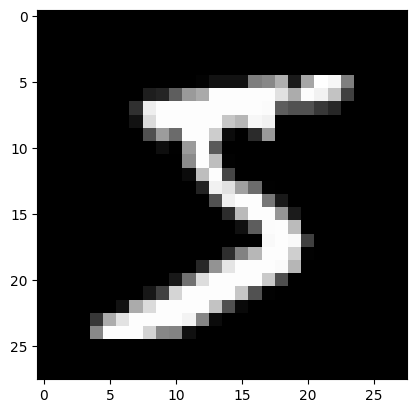

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from keras.datasets import mnist
from PIL import Image
import matplotlib.pyplot as plt

# 画像を表示する関数
def img_show(img):
    plt.imshow(img, cmap='gray')
    plt.show()

# MNISTデータセットをロード
(X_train, t_train), (X_test, t_test) = mnist.load_data()

# データをフラット化する
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

img = X_train[0]
label = t_train[0]
print(label) #5

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

## ニューラルネットワークの推論処理

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from keras.datasets import mnist
from PIL import Image
import matplotlib.pyplot as plt

def get_data():
    (X_train, t_train), (X_test, t_test) = mnist.load_data()
    # データをフラット化する
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    # Normalization
    X_train = X_train / 255
    X_test = X_test / 255
    return X_test, t_test

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def init_network():
#    with open("sample_weight.pkl", "rb") as f:
#      network = pickle.load(f)
    # GitHubのURL
    url = "https://github.com/Ssurf777/DL_from_scratch/blob/main/sample_weight.pkl?raw=true"

    # URLからデータを取得
    response = requests.get(url)
    response.raise_for_status()  # リクエストが成功したか確認
    # バイナリデータとしてロード
    network = pickle.loads(response.content)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = sigmoid(a3)

    return y

### GithubよりWeightのロード


In [ ]:
import requests
import pickle

# GitHubのURL
url = "https://github.com/Ssurf777/DL_from_scratch/blob/main/sample_weight.pkl?raw=true"

# URLからデータを取得
response = requests.get(url)
response.raise_for_status()  # リクエストが成功したか確認

# バイナリデータとしてロード
weights = pickle.loads(response.content)

# 重みを確認
print(weights)


{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" +str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


## バッチ処理

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(f"x.shape:{x.shape}")
print(f"x[0].shape:{x[0].shape}")
print(f"W1.shape:{W1.shape}")
print(f"W2.shape:{W2.shape}")
print(f"W3.shape:{W3.shape}")

x.shape:(10000, 784)
x[0].shape:(784,)
W1.shape:(784, 50)
W2.shape:(50, 100)
W3.shape:(100, 10)


### バッチ数100で推論処理を実装する

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [ ]:
print(accuracy_cnt / len(x))

0.9352


# ニューラルネットワークの学習

In [ ]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from keras.datasets import mnist

# MNISTデータセットをロード
(X_train, t_train), (X_test, t_test) = mnist.load_data()

# データをフラット化する
X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255


# テストデータのラベルをone-hotエンコードする
from keras.utils import to_categorical

t_test = to_categorical(t_test)
t_train = to_categorical(t_train)

# データを正規化しない（そのまま使用）
print(f"X_train shape: {X_train.shape}, t_train shape: {t_train.shape}")
print(f"X_test shape: {X_test.shape}, t_test shape: {t_test.shape}")


X_train shape: (60000, 784), t_train shape: (60000, 10)
X_test shape: (10000, 784), t_test shape: (10000, 10)


In [ ]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
batch_mask

array([45683, 34675,  9061, 44754, 28991, 47207,  3272, 55262, 32961,
        8888])

## ☆バッチ対応版　交差エントロピー誤差の実装

$$
E = - \frac{1}{N} \Sigma_{n} \Sigma_{k} t_{nk} \log{y_{nk}}
$$

$$
N:データ数
$$

$$
t_{nk}:教師データ
$$

$$
y_{nk}:ニューラルネットワークの出力
$$


## ☆One-hot表示における交差エントロピー誤差

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
      t = t.reshape(1, t.size)
      y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

## ☆ラベル表示における交差エントロピー誤差

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 数値微分

簡単な微分
$$
y=0.01x^2+0.1x
$$

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/ (2*h)

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1 * x

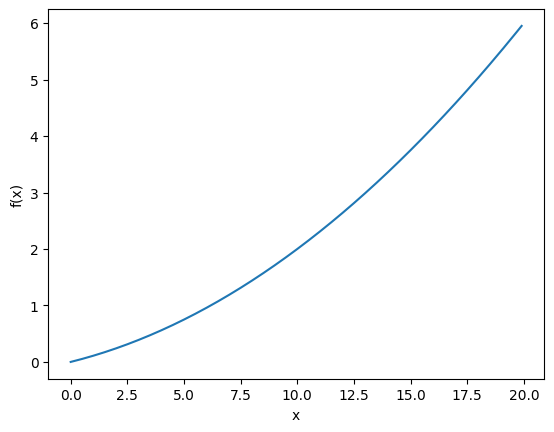

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
numerical_diff(function_1, 10)

0.2999999999986347

## 偏微分


$$
f(x,y) = x^2 + y^2
$$

In [ ]:
import numpy as np
def function_2(x,y):
    return x**2 + y**2

def function_3(x):
    return x[0]**2 + x[1]**2


In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/ (2*h)

$$
{x = 3},{y= 4}のとき,{\partial}f/{\partial}xを求める
$$

In [ ]:
def function_tmp1(x):
    return x**2+4**2

dfdx = numerical_diff(function_tmp1, 3)
print(dfdx)

6.00000000000378


$$
{x = 3},{y= 4}のとき,{\partial}f/{\partial}yを求める
$$

In [ ]:
def function_tmp2(y):
    return 3**2 + y**2

dfdy = numerical_diff(function_tmp2, 4)
print(dfdy)

7.999999999999119


## ☆空間微分

$$
grad = \frac {f(x + h) + f(x-h)}{2h}
$$

$$
h = 1.0^{-4}
$$

In [ ]:
def numerical_grad(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # xと同じ形状の配列を生成
    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x + h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x - h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
    return grad

In [ ]:
dfdx_dfdy = numerical_grad(function_3, np.array([3.0,4.0]))

In [ ]:
print(dfdx_dfdy)

[6. 8.]


## 勾配法


*   関数の極小値,最小値、鞍点(saddle point)では勾配が0となる
*   **プラトー**:学習が進まない停滞期



$$
x_0 = x_0 - η\frac {∂f}{∂x_0}
$$

$$
x_1 = x_1 - η\frac {∂f}{∂x_1}
$$
ステップ毎にxを変化させ関数の値を減らしていく

$$
η:学習率(learning　rate)
$$

## 勾配降下法

In [ ]:
import numpy as np

def numerical_grad(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # xと同じ形状の配列を生成
    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x + h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x - h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
    return grad

def gradient_descent(f, init_x, lr=0.05, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_grad(f, x)
        x -= lr * grad
        #print(f"step{i}, func{x}")
    return x

次の関数の最小値を勾配法で求めよ

$$
f(x_0, x_1) = x_0^2+x_1^2
$$

In [ ]:
def function(x):
    return x[0]**2+x[1]**2

init = np.array([-3.0, 4.0])
min = gradient_descent(function,init_x=init, lr=0.1, step_num=100)

print(min)

[-6.11110793e-10  8.14814391e-10]


学習率が大きい場合 lr=10

In [ ]:
init = np.array([-3.0, 4.0])
min = gradient_descent(function,init_x=init, lr=10, step_num=100)
print(min)

[-2.58983747e+13 -1.29524862e+12]


学習率が小さすぎる場合 lr=1.0e-10

In [ ]:
init = np.array([-3.0, 4.0])
min = gradient_descent(function,init_x=init, lr=1e-10, step_num=100)
print(min)

[-2.99999994  3.99999992]


**適切な学習率を設定しなければならない**

## ニューラルネットワークに対する勾配

形状2x3の重みWだけを持つニューラルネットワークがあり、
損失関数Lであらわす場合を考える

この時の勾配は
$$
\frac {∂L}{∂W}
$$

$$
W= \begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{pmatrix}
$$

$$
\frac {\partial L}{\partial W}= \begin{pmatrix}
\frac {\partial L}{w_{11}} & \frac {\partial L}{w_{12}} &\frac {\partial L}{ w_{13}} \\
\frac {\partial L}{w_{21}} & \frac {\partial L}{w_{22}} & \frac {\partial L}{w_{23}}
\end{pmatrix}
$$


In [ ]:
# 勾配を求める
import sys, os
sys.path.append(os.pardir)
import numpy as np
# coding: utf-8
import numpy as np


def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)


def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros_like(x)
    grad[x>=0] = 1
    return grad


def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)
# -------------------------------------------------------------------------------
#from common.functions import softmax, cross_entropy_error
#from common.gradient import numerical_gradient

In [ ]:
# coding: utf-8
import numpy as np

def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 値を元に戻す

    return grad


def numerical_gradient_2d(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)

        return grad


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 値を元に戻す
        it.iternext()

    return grad

In [ ]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # Gaussion
    def predict(self, x):
        return np.dot(x ,self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [ ]:
net = simpleNet()
print(net.W) # Weight parameters

[[ 0.18812885 -0.60931076  0.77554795]
 [-0.99603944 -0.29853997  0.49960944]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.78355819 -0.63427243  0.91497727]


In [ ]:
np.argmax(p)

2

In [ ]:
# true label
t = np.array([0, 0, 1])

# cross entropy error
net.loss(x, t)

0.33315127018814916

In [ ]:
# 続いて1回目の勾配を求めます
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07866849  0.09133448 -0.17000297]
 [ 0.11800273  0.13700173 -0.25500446]]


~~~python
dW = numerical_gradient(f, net.W)
print(dW)
~~~
上記を実行して,
~~~
[[ 0.07866849  0.09133448 -0.17000297]
 [ 0.11800273  0.13700173 -0.25500446]]
 ~~~
 の場合,
 $$
 \frac {∂L}{∂W}なので
 $$

 $$
 \frac {∂L}{∂W_{11}}=0.07
 $$

 $$
 \frac {∂L}{∂W_{23}}=-0.25
 $$
であることから
 $$
 \frac {∂L}{∂W_{23}}
 $$
を更新する方がインパクトがある
また、$$∂L/∂W_{23}$$を0.25h更新するとLossが小さくなる
また、$$∂L/∂W_{11}$$を-0.07h更新するとLossが小さくなる


## ☆lamdaによる関数定義

In [ ]:
f = lambda w: net.loss(x ,t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07866849  0.09133448 -0.17000297]
 [ 0.11800273  0.13700173 -0.25500446]]


上記のlambda表記は下記と同じになる
~~~python
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
~~~

# 学習アルゴリズムの実装

 * STEP1 ミニバッチ:教師データからランダムにデータを抽出(ミニバッチ). ミニバッチ毎にLoss関数の値を小さくすることを目的にする

 * STEP2 勾配の算出:ミニバッチのLoss関数値を小さくするために各重みパラメータの勾配を求める


 * STEP3 パラメータ更新：重みパラメータを勾配方向に微小量だけ更新する


 * STEP4 くりかえり：STEP1,2,3を繰り返す

※無作為にデータを抽出していることから,**確率的勾配降下法 (Stochactic Gradient Descent)**と呼ぶ

## 2層のニューラルネットワークのクラス

In [ ]:
import numpy as np
import sys, os
#sys.path.append(os.dir)

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
      # weghts Initialization
      self.params = {}
      self.params['W1'] = weight_init_std * \
                          np.random.randn(input_size, hidden_size)
      self.params['b1'] = np.zeros(hidden_size)
      self.params['W2'] = weight_init_std * \
                          np.random.randn(hidden_size, output_size)
      self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:input data t:true data
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum( y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads



In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
net.params['W1']

array([[ 0.00446855, -0.00395728, -0.01618994, ..., -0.0056047 ,
        -0.0061    ,  0.00279019],
       [ 0.01160916, -0.01509885, -0.0160556 , ..., -0.00214654,
        -0.0104748 ,  0.01407492],
       [ 0.01561211,  0.00862223,  0.00241375, ..., -0.01188218,
        -0.00851219,  0.00057541],
       ...,
       [-0.01298242, -0.01575393, -0.01445989, ...,  0.00214694,
         0.00084185, -0.00346373],
       [ 0.01301772,  0.00259195, -0.00161692, ..., -0.00476061,
         0.00721042, -0.00649785],
       [ 0.00162193,  0.01694295,  0.00563494, ..., -0.00222237,
        -0.02675795,  0.01206792]])

In [ ]:
x = np.random.rand(100, 784)
y = net.predict(x)

t = np.random.rand(100, 10)

In [ ]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t)

In [ ]:
grads

{'W1': array([[-3.93534116e-04,  1.34494647e-04, -1.15448353e-04, ...,
          1.66298901e-04,  1.01724313e-04,  8.16497359e-05],
        [-3.44815032e-04,  1.49965531e-04, -6.52833765e-05, ...,
          1.56210509e-04,  1.30676994e-04,  1.38755856e-04],
        [-2.62445201e-04,  2.05245516e-04, -2.90263880e-04, ...,
          1.96186347e-04,  5.15756104e-06,  2.61635846e-05],
        ...,
        [-2.47840506e-04,  1.29104412e-04, -1.12336440e-04, ...,
          1.70239036e-04,  1.12177592e-04,  3.08201376e-05],
        [-2.63992275e-04,  1.73565562e-05, -5.14143039e-05, ...,
          8.16655987e-05,  1.18106194e-04,  2.38084996e-05],
        [-3.10866506e-04,  8.23105273e-05, -1.70057637e-04, ...,
          9.83721882e-05,  1.50243189e-04,  1.09999727e-04]]),
 'b1': array([-6.02650276e-04,  2.34967494e-04, -2.56866466e-04, -3.48013345e-04,
         2.70958100e-04, -2.34635888e-05,  7.15956183e-07,  3.41562767e-04,
         1.30765130e-04,  1.40026657e-06,  1.48571258e-04, -2.133

## ミニバッチ学習の実装

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
#from common.functions import *
#from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

### 時間の掛かる微分　と　高速化（誤差逆伝播）
~~~python
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
~~~

### 高速版
~~~python
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads
~~~

## 学習とLoss関数の推移

In [ ]:
import numpy as np
from keras.datasets import mnist
# テストデータのラベルをone-hotエンコードする
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

# MNISTデータセットをロード
(X_train, t_train), (X_test, t_test) = mnist.load_data()

# 画像データを正規化 (0~255の値を持つピクセルを0~1の範囲にスケーリング)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train.shape)
print(X_test.shape)


# flatten
#X_train = X_train.flatten() # これだとすべてが平坦化されてだめだ
#X_test = X_test.flatten() # これだとすべてが平坦化されてだめだ
#reshape
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print(X_train.shape)
print(X_test.shape)

# ラベルをone-hotエンコード
t_test = to_categorical(t_test)
t_train = to_categorical(t_train)

train_loss_list=[]
# ハイパーパラメータ
iters_num = 10000
train_size = X_train.shape[0]
batch_size = 100
learing_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
losshis=[]

for i in range(iters_num):
    #print(i)
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]

    # gradient calc.
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # parameters refix
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learing_rate * grad[key]

    # loss history
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


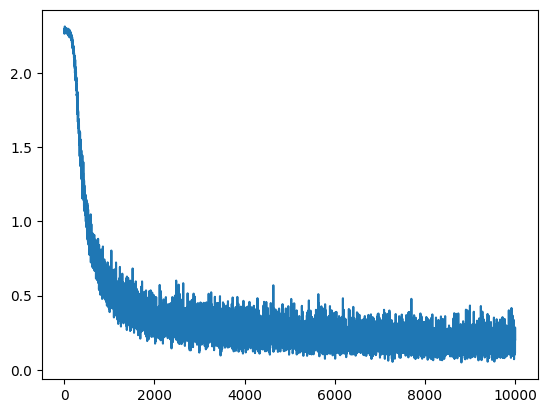

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list)


# 5章　単純なレイヤの実装

In [1]:
import numpy as np
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y # xとyをひっくり返す
        dy = dout * self.x

        return dx, dy

In [3]:
apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple,apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [5]:
# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [12]:
# 加算レイヤの実装
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [14]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num=mul_orange_layer.backward(dorange_price)
dapple, adpple_num = mul_apple_layer.backward(dapple_price)

print(dapple_num, dapple, dorange, dorange_num, dtax)

110.00000000000001 2.2 3.3000000000000003 165.0 650


# 活性化関数 ReLU

$$
y = \begin{cases}
0 & \text{if } x \leq 0 \\
x & \text{if } x > 0
\end{cases}
$$

$$
\frac{ \partial{y}}{\partial{x}}  = \begin{cases}
0 & \text{if } x \leq 0 \\
1 & \text{if } x > 0
\end{cases}
$$

In [15]:
class ReLU:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <=0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

In [16]:
# mask変数はTrue/FalseからなるNumpy配列である
x = np.array( [[1, -0.5],[-2.0, 3.0]] )
print(x)

mask = ( x <= 0 )
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


# ☆活性化関数 Sigmoid

$$
y=\frac{1}{1+\exp(-x)}
$$

$$
\frac{\partial y}{\partial x}
= -(1+\exp(-x))^{-2} ・(-\exp(-x))
$$
$$
=\frac{1}{1+\exp(-x)} ・\frac{\exp(-x)}{1+\exp(-x)}
$$
$$
=y・(\frac { 1+\exp(-x)-1}{1+\exp(-x)})
$$
$$
=y(1-y)
$$


X → sigmoid → Y
$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} ・ \frac{\partial y}{\partial x}
$$
$$
= \frac{\partial L}{\partial y} ・ y(1-y)
$$

In [17]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 /( 1 + np.exp(-x) )
        self.out = out

        return out

    def backward(self,dout):
        dx = dout( self.out*(1 - self.out) )
        return dx